# Predicting AirBnB House Prices in Seattle

## by Stefan Lietz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [2]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
print(df_reviews.shape)
df_reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
print(df_listings.id.nunique())
print(df_listings.shape)
df_listings.head()

3818
(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
col_list = []
for col in df_listings.columns:
    col_list.append(col)

print(col_list, len(col_list)) # printing all column names

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

In [6]:
df_listings["smart_location"].value_counts()
# can be dropped, since no informational value

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
seattle, wa                     1
Name: smart_location, dtype: int64

In [7]:
df_listings["city"].value_counts()
# can be dropped, since no informational value

Seattle                  3810
West Seattle                2
Seattle                     2
seattle                     1
Phinney Ridge Seattle       1
西雅图                         1
Ballard, Seattle            1
Name: city, dtype: int64

In [8]:
df_listings["state"].value_counts()
# can be dropped, since no informational value

WA    3817
wa       1
Name: state, dtype: int64

In [9]:
df_listings["country_code"].value_counts()
# can be dropped, since no informational value

US    3818
Name: country_code, dtype: int64

In [10]:
df_listings["bed_type"].value_counts()
# going to inspect just offers with "Real Beds" for the sake of comparability

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [11]:
df_listings["property_type"].value_counts()
# will focus on "House" and "Apartment", because they cover the majority of observations

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [12]:
 # filtering for the majority of property_type and bed_type to 1) create a binary variable as a dummy later and 
## 2) ensure comparability

df_prices = df_listings.copy()
df_prices = df_prices[((df_prices["property_type"]=="House") | (df_prices["property_type"]=="Apartment")) & 
                     (df_prices["bed_type"]=="Real Bed")]

In [13]:
df_prices["property_type"].value_counts()

House        1678
Apartment    1621
Name: property_type, dtype: int64

In [14]:
df_prices["bed_type"].value_counts()

Real Bed    3299
Name: bed_type, dtype: int64

In [15]:
df_prices["room_type"].value_counts()

Entire home/apt    2283
Private room        941
Shared room          75
Name: room_type, dtype: int64

In [16]:
df_prices = df_prices[(df_prices["room_type"] == "Entire home/apt") | (df_prices["room_type"] == "Private room")]

In [17]:
df_prices.drop(df_prices.columns.difference(['id','neighborhood_overview','property_type', 'room_type', 'accommodates', 'bathrooms',
                                                 'bedrooms', 'beds', 'bed_type' 'number_of_reviews',
                                                 'first_review', 'last_review', 'review_scores_rating', 'amenities', 'square_feet', 
                                                 'price', 'security_deposit', 'cleaning_fee',
                                                 'review_scores_accuracy','review_scores_cleanliness', 
                                                 'review_scores_checkin','review_scores_communication', 
                                                 'review_scores_location', 'review_scores_value', 'latitude', 'longitude',
                                                 "extra_people", "room_type", "property_type"]), axis = 1, inplace=True)

In [18]:
df_prices.head()

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,extra_people,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$5.00,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$0.00,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,Upper Queen Anne is a charming neighborhood fu...,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,...,$25.00,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,...,$0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,...,$15.00,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [19]:
df_prices.columns

Index(['id', 'neighborhood_overview', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [20]:
df_prices.info()
# "prices" are object types, need to be floats
# "security_deposit" is object type, needs to be float
# "cleaning_fee" is object type, needs to be float
# "neighborhood_overview", "security_deposit", "cleaning_fee" and especially show a lot of missing values
# just a few NaNs for bathrooms, bedrooms and bed, hence going to going drop the rows
## square_feet show up too much missing values, hence imputation doesnt make sense anymore for predicting prices, dropping the feature
# the different review categories have a few outliers, but might be useful to impute the missing values by using the mean of the features
# the missing values of cleaning_fee and security_deposit might be a result of non-existent conditions of the house-offer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224 entries, 0 to 3817
Data columns (total 25 columns):
id                             3224 non-null int64
neighborhood_overview          2358 non-null object
latitude                       3224 non-null float64
longitude                      3224 non-null float64
property_type                  3224 non-null object
room_type                      3224 non-null object
accommodates                   3224 non-null int64
bathrooms                      3209 non-null float64
bedrooms                       3220 non-null float64
beds                           3223 non-null float64
amenities                      3224 non-null object
square_feet                    84 non-null float64
price                          3224 non-null object
security_deposit               1614 non-null object
cleaning_fee                   2408 non-null object
extra_people                   3224 non-null object
first_review                   2732 non-null object
last_re

In [21]:
df_prices.drop("square_feet", axis = 1, inplace = True)

In [22]:
#check
df_prices.columns

Index(['id', 'neighborhood_overview', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [23]:
df_prices.dropna(axis=0,subset = ["bedrooms"], how='any', inplace = True)
df_prices.dropna(axis=0,subset = ["bathrooms"], how='any', inplace = True)
df_prices.dropna(axis=0,subset = ["beds"], how='any', inplace = True)

df_prices['bathrooms'] = df_prices['bathrooms'].astype(float)
df_prices['bedrooms'] = df_prices['bedrooms'].astype(float)
df_prices['beds'] = df_prices['beds'].astype(float)

df_prices['accommodates'] = df_prices['accommodates'].astype(float)
# float types for PCA later

In [24]:
# check
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3205 entries, 0 to 3817
Data columns (total 24 columns):
id                             3205 non-null int64
neighborhood_overview          2355 non-null object
latitude                       3205 non-null float64
longitude                      3205 non-null float64
property_type                  3205 non-null object
room_type                      3205 non-null object
accommodates                   3205 non-null float64
bathrooms                      3205 non-null float64
bedrooms                       3205 non-null float64
beds                           3205 non-null float64
amenities                      3205 non-null object
price                          3205 non-null object
security_deposit               1607 non-null object
cleaning_fee                   2396 non-null object
extra_people                   3205 non-null object
first_review                   2717 non-null object
last_review                    2717 non-null object
revi

In [25]:
# removing $ and comma as thousand separators
df_prices['price'] = df_prices['price'].str.replace(',', '').str.slice(start = 1).astype(float)
df_prices["cleaning_fee"] = df_prices['cleaning_fee'].str.replace(',', '').str.slice(start = 1).astype(float)
df_prices["security_deposit"] = df_prices['security_deposit'].str.replace(',', '').str.slice(start = 1).astype(float)

# alternatively: df_prices['price_float'] = df_prices['price'].str.replace(',', '').str.replace("$", "")

In [26]:
# check
df_prices['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [27]:
# imputing 
# create lambda function
fill_mean = lambda col: col.fillna(col.mean())
df_prices[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
       'review_scores_value']]= df_prices[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
       'review_scores_value']].apply(fill_mean, axis=0)

In [28]:
# check
df_prices.head()

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,extra_people,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,$5.00,2011-11-01,2016-01-02,95.000000,10.000000,10.000000,10.00000,10.000000,9.00000,10.000000
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,$0.00,2013-08-19,2015-12-29,96.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000
2,3308979,Upper Queen Anne is a charming neighborhood fu...,47.629724,-122.369483,House,Entire home/apt,11.0,4.5,5.0,7.0,...,$25.00,2014-07-30,2015-09-03,97.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,$0.00,NaN,NaN,94.453165,9.632752,9.562894,9.78789,9.807935,9.60705,9.440238
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,$15.00,2012-07-10,2015-10-24,92.000000,9.000000,9.000000,10.00000,10.000000,9.00000,9.000000


#### EVTL nochmal drüber nachdenken, doch das Minimum zu nehmen, da es darauf hindeutet, dass der service eher nicht vorhanden ist => je nachdem, wie die Predictions sind

In [29]:
# JE NACHDEM DIE ZELLE HIER KICKEN

#df_prices[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
 #      'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
  #     'review_scores_value']].min()

In [30]:
# filling the NaNs of "cleaning_fee" and "security_deposit" with 0
df_prices[["cleaning_fee", "security_deposit"]] = df_prices[["cleaning_fee", "security_deposit"]].fillna(0)

In [31]:
# check
df_prices[["cleaning_fee", "security_deposit"]].head(20)

,cleaning_fee,security_deposit
0,0.0,0.0
1,40.0,100.0
2,300.0,1000.0
3,0.0,0.0
4,125.0,700.0
5,40.0,0.0
6,0.0,150.0
8,0.0,0.0
9,40.0,100.0
10,15.0,0.0


In [32]:
df_prices.describe()

# the individual ratings might be an indicator for the quality of different services that can be priced in so they might
## be useful as well in predicting prices

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.205000e+03,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000
mean,5.476972e+06,47.629431,-122.333188,3.482683,1.257566,1.350078,1.783463,132.015913,142.173479,47.759126,94.453165,9.632752,9.562894,9.787890,9.807935,9.607050,9.440238
std,2.951602e+06,0.043416,0.031875,2.001427,0.557726,0.919550,1.163281,90.323058,226.984214,51.149423,6.251675,0.657187,0.729931,0.550192,0.527789,0.584567,0.703540
min,4.291000e+03,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,3.157738e+06,47.609596,-122.354424,2.000000,1.000000,1.000000,1.000000,79.000000,0.000000,0.000000,93.000000,9.632752,9.000000,9.787890,9.807935,9.000000,9.000000
50%,5.946675e+06,47.623831,-122.329241,3.000000,1.000000,1.000000,1.000000,105.000000,95.000000,35.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.440238
75%,7.968548e+06,47.663918,-122.311165,4.000000,1.000000,2.000000,2.000000,150.000000,200.000000,75.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1.034016e+07,47.733358,-122.240607,16.000000,5.000000,7.000000,15.000000,1000.000000,2500.000000,300.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
print(df_listings["price"].max())
np.quantile(df_prices["price"], 0.99)
# the last 1%-quantile covers more than 50% of the overall price intervall

$999.00


475.0

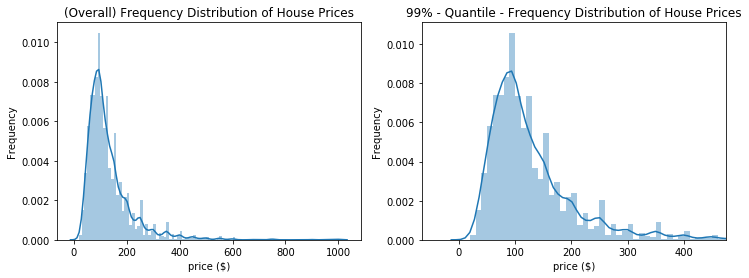

In [34]:
plt.figure(figsize = [12,4])

plt.subplot(1, 2, 1) 
bins = np.arange(0, df_prices["price"].max() +10, 10)
sns.distplot(df_prices["price"], bins = bins)
plt.ylabel("Frequency")
plt.xlabel("price ($)")
plt.title("(Overall) Frequency Distribution of House Prices");


plt.subplot(1, 2, 2)
bins = np.arange(0, np.quantile(df_prices["price"], 0.99) +10, 10)
sns.distplot(df_prices["price"], bins = bins)
plt.ylabel("Frequency")
plt.xlabel("price ($)")
plt.title("99% - Quantile - Frequency Distribution of House Prices")
plt.xlim(right = np.quantile(df_prices["price"], 0.99));
# roughly normally distributed, right skewed, ignored the last quantile (outliers) for plotting the second distribution


In [35]:
df_prices[df_prices["price"] > np.quantile(df_prices["price"], 0.99)]["id"].count()
# Gonna drop the last 1%, to account for the outliers

32

In [36]:
# selecting just the first 99% of the price distribution
df_prices = df_prices[df_prices.price <= np.quantile(df_prices.price, 0.99)]

In [37]:
# check
df_prices.price.max()

475.0

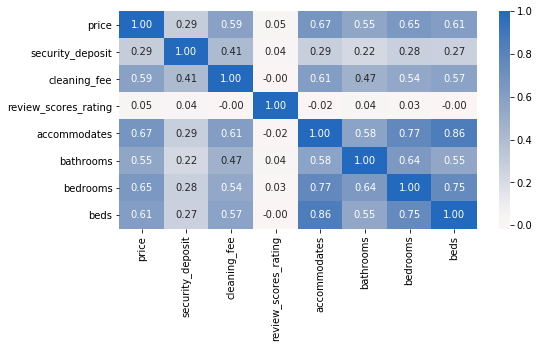

In [38]:
numeric_feat = ["price", "security_deposit", "cleaning_fee", "review_scores_rating",
                "accommodates", "bathrooms", "bedrooms", "beds"]

plt.figure(figsize = [8, 4])
sns.heatmap(df_prices[numeric_feat].corr(), cmap = "vlag_r", annot = True, fmt = ".2f", center = 0);

# nearly no correlation between rating and price!
# very high correlation between "accomodates, beds and bedrooms - which makes sense"
# also cleaning fee and price are highly correlated, the fee might be a share of the whole price

### PCA - Bed, bedrooms und accommodates APPROXIMATION OF SIZE

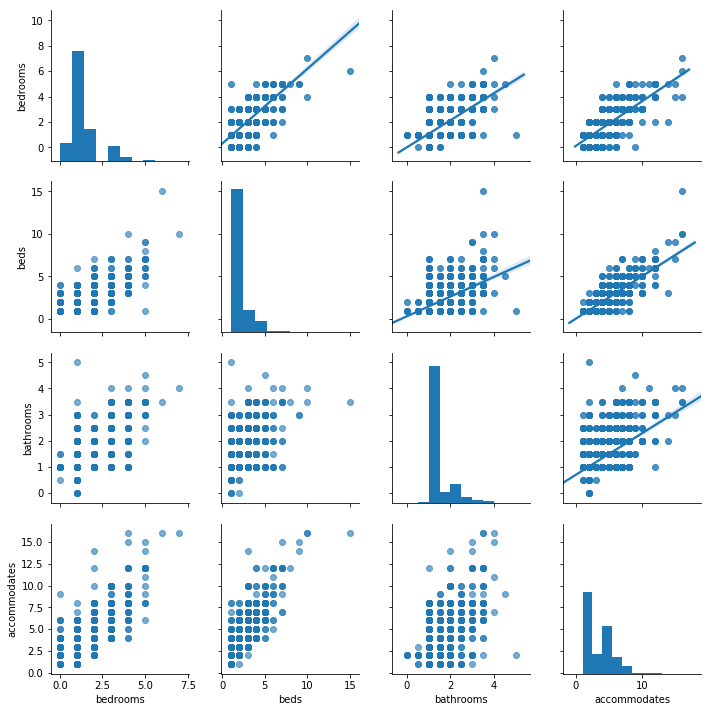

In [39]:
PCA_vars = ["bedrooms", "beds", "bathrooms", "accommodates"]
g = sns.PairGrid(data = df_prices, vars = PCA_vars)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, alpha = 0.6)
g.map_upper(sns.regplot);
# all features show a more or less visible linear relationship

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
df_PCA = df_prices[["bedrooms", "beds", "bathrooms", "accommodates"]]
df_PCA.head()

,bedrooms,beds,bathrooms,accommodates
0,1.0,1.0,1.0,4.0
1,1.0,1.0,1.0,4.0
3,0.0,2.0,1.0,3.0
4,3.0,3.0,2.0,6.0
5,1.0,1.0,1.0,2.0


In [43]:
scaler.fit(df_PCA)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_data = scaler.transform(df_PCA)

In [45]:
print(scaled_data.shape)
scaled_data

(3173, 4)


array([[-0.37074489, -0.67456974, -0.45616471,  0.29022352],
       [-0.37074489, -0.67456974, -0.45616471,  0.29022352],
       [-1.50953826,  0.21578375, -0.45616471, -0.22625389],
       ...,
       [-0.37074489,  0.21578375, -0.45616471,  0.29022352],
       [-0.37074489, -0.67456974, -0.45616471, -0.74273131],
       [ 0.76804847, -0.67456974,  0.4831024 , -0.22625389]])

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components = 1)

In [48]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
print(pca.components_.shape)
pca.components_

(1, 4)


array([[0.51586931, 0.51641369, 0.43922712, 0.52371299]])

In [50]:
pca.explained_variance_ratio_

array([0.77132259])

In [51]:
pca_transformed = pca.fit_transform(scaled_data)
print(pca_transformed.shape)
pca_transformed

(3173, 1)


array([[-0.58797905],
       [-0.58797905],
       [-0.9861428 ],
       ...,
       [-0.12818831],
       [-1.1289509 ],
       [ 0.14155516]])

In [52]:
df_prices["house_size"] = pca_transformed

In [53]:
df_prices.head()

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_size
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,2011-11-01,2016-01-02,95.000000,10.000000,10.000000,10.00000,10.000000,9.00000,10.000000,-0.587979
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,2013-08-19,2015-12-29,96.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,-0.587979
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,NaN,NaN,94.453165,9.632752,9.562894,9.78789,9.807935,9.60705,9.440238,-0.986143
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,2012-07-10,2015-10-24,92.000000,9.000000,9.000000,10.00000,10.000000,9.00000,9.000000,2.872615
5,5956968,This part of Queen Anne has wonderful views an...,47.630525,-122.366174,House,Private room,2.0,1.0,1.0,1.0,...,2015-06-11,2015-09-28,95.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,-1.128951


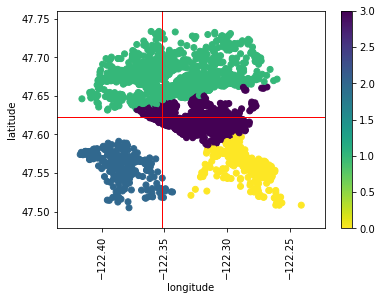

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_prices[["longitude", "latitude"]])
plt.scatter(df_prices["longitude"], df_prices["latitude"], c = kmeans.labels_, cmap = "viridis_r")
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.xticks(rotation = 90)
plt.colorbar();
# cluster 0 = center
# cluster 1 = southeast
# cluster 2 = north
# cluster 3 = southwest

# center seattle (https://latitude.to/articles-by-country/us/united-states/17823/seattle-center)
plt.axvline(x=-122.3520, color="r", linewidth = 1)
plt.axhline(y=47.6225 , color="r", linewidth = 1);

In [55]:
df_prices["location"] = kmeans.labels_

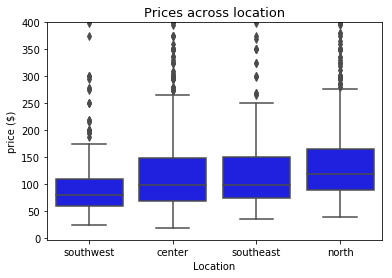

In [56]:
ticks = [0, 1, 2, 3]
labels = ["southwest", "center", "southeast", "north"]


sns.boxplot(data = df_prices, x = "location", y = "price", color = "blue")
plt.ylabel("price ($)")
plt.xlabel("Location")
plt.title("Prices across location", fontsize = 13)
plt.xticks(ticks, labels)
plt.ylim(top = np.quantile(df_prices["price"], 0.99));

In [57]:
print(df_prices.groupby("location").mean()["price"])
df_prices.groupby("location").describe()["price"]

# seems like the location does make a difference for the house prices, even when outliers (last 1%) are excluded
# the southwest is the most expensive, followed by north, center and last but not least southeast

location
0     98.188612
1    121.968189
2    124.590164
3    137.360056
Name: price, dtype: float64


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
0,281.0,98.188612,60.388770,25.0,60.0,80.0,110.0,399.0
1,1226.0,121.968189,77.997790,20.0,70.0,99.0,149.0,475.0
2,244.0,124.590164,77.341076,35.0,75.0,99.0,150.0,450.0
3,1422.0,137.360056,69.357064,39.0,90.0,120.0,165.0,475.0


#### dummy for feature "location"

In [58]:
df_prices[["center", "southeast", "north", "southwest"]] = pd.get_dummies(df_prices["location"])

In [59]:
df_prices.head(10)[["location", "center", "southeast", "north", "southwest"]]

,location,center,southeast,north,southwest
0,1,0,1,0,0
1,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
5,3,0,0,0,1
6,1,0,1,0,0
8,3,0,0,0,1
9,1,0,1,0,0
10,3,0,0,0,1
11,1,0,1,0,0


In [60]:
df_prices.drop(["location", "center"], axis = 1, inplace = True)
# center is baseline

In [61]:
df_prices.head()

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_size,southeast,north,southwest
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.000000,10.000000,10.00000,10.000000,9.00000,10.000000,-0.587979,1,0,0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,-0.587979,1,0,0
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,9.632752,9.562894,9.78789,9.807935,9.60705,9.440238,-0.986143,1,0,0
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,9.000000,9.000000,10.00000,10.000000,9.00000,9.000000,2.872615,1,0,0
5,5956968,This part of Queen Anne has wonderful views an...,47.630525,-122.366174,House,Private room,2.0,1.0,1.0,1.0,...,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,-1.128951,0,0,1


#### dummy for feature "property type"

In [62]:
df_prices["property_type"].head(4)

0    Apartment
1    Apartment
3    Apartment
4        House
Name: property_type, dtype: object

In [63]:
df_prices[["Apartment", "House"]] = pd.get_dummies(df_prices["property_type"])
df_prices.head(4)

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_size,southeast,north,southwest,Apartment,House
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.00000,10.000000,9.00000,10.000000,-0.587979,1,0,0,1,0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.00000,10.000000,10.00000,10.000000,-0.587979,1,0,0,1,0
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,9.78789,9.807935,9.60705,9.440238,-0.986143,1,0,0,1,0
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,10.00000,10.000000,9.00000,9.000000,2.872615,1,0,0,0,1


In [64]:
df_prices.drop("House", axis = 1, inplace = True)
df_prices.head(1)
# 1 = Apartment
# 0 = House (baseline)

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_size,southeast,north,southwest,Apartment
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.0,10.0,10.0,9.0,10.0,-0.587979,1,0,0,1


#### dummy for "room type"

In [65]:
df_prices[["entire_house", "private_room"]] = pd.get_dummies(df_prices["room_type"])
df_prices.head()

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_communication,review_scores_location,review_scores_value,house_size,southeast,north,southwest,Apartment,entire_house,private_room
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.000000,9.00000,10.000000,-0.587979,1,0,0,1,1,0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,10.000000,10.00000,10.000000,-0.587979,1,0,0,1,1,0
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,9.807935,9.60705,9.440238,-0.986143,1,0,0,1,1,0
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,10.000000,9.00000,9.000000,2.872615,1,0,0,0,1,0
5,5956968,This part of Queen Anne has wonderful views an...,47.630525,-122.366174,House,Private room,2.0,1.0,1.0,1.0,...,10.000000,10.00000,10.000000,-1.128951,0,0,1,0,0,1


In [66]:
df_prices.drop("private_room", axis = 1, inplace = True)

### Linear Regression - Predicting Prices

In [67]:
X = df_prices[["house_size", "Apartment", "entire_house", "southeast", "north", "southwest"]]

y = df_prices["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_prices = LinearRegression(normalize = True)

lm_prices.fit(X_train, y_train)

y_train_preds = lm_prices.predict(X_train)

y_test_preds = lm_prices.predict(X_test)

print("The r-squared score of the model for the training-data is {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
r2_all_variables = r2_score(y_test, y_test_preds)


"The r-squared score of the model for the test-data is {} on {} values.".format(r2_all_variables, len(y_test))

The r-squared score of the model for the training-data is 0.5724302055862056 on 2221 values.


'The r-squared score of the model for the test-data is 0.6243628903005332 on 952 values.'

**Lasso Regression**

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [69]:
i = 0.000001
alphas = [i]

while i < 1:
    i = i*10
    alphas.append(i)

alphas.extend(list(np.arange(10, 21, 5)))
print(alphas)

parameters = {"alpha": alphas}

[1e-06, 9.999999999999999e-06, 9.999999999999999e-05, 0.001, 0.01, 0.1, 1.0, 10, 15, 20]


In [70]:
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, cv = 3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-06, 9.999999999999999e-06, 9.999999999999999e-05, 0.001, 0.01, 0.1, 1.0, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
print(lasso_regressor.best_params_)
train_score=lasso_regressor.score(X_train,y_train)
test_score=lasso_regressor.score(X_test,y_test)

print(train_score)
print(test_score)


{'alpha': 1e-06}
0.5724302055861792
0.6243629008083045


In [72]:
col_list = ['r^2','intercept']
col_list.extend(list(X.columns))

ind = ['alpha_%.2g'%alphas[i] for i in range(len(alphas))]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col_list)

intercept_data = []
coef_data = []
intercept_data = []
r_square_data = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train) 
    intercept_data.append(lasso.intercept_)
    coef_data.append(lasso.coef_)
    r_square_data.append(lasso.score(X_test, y_test))   

coef_matrix_lasso[list(X.columns)]  = coef_data
coef_matrix_lasso["r^2"] = r_square_data
coef_matrix_lasso["intercept"] = intercept_data

coef_matrix_lasso

# https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

,r^2,intercept,house_size,Apartment,entire_house,southeast,north,southwest
alpha_1e-06,0.624363,75.928308,26.0858,-6.76669,38.9581,17.9263,21.4419,42.6175
alpha_1e-05,0.624363,75.928623,26.0858,-6.76658,38.958,17.926,21.4415,42.6171
alpha_0.0001,0.624364,75.931773,26.0859,-6.76549,38.9573,17.9227,21.4374,42.6135
alpha_0.001,0.624373,75.963305,26.0869,-6.75459,38.9501,17.8897,21.3959,42.5777
alpha_0.01,0.624465,76.278247,26.0967,-6.64566,38.8785,17.5599,20.9819,42.2204
alpha_0.1,0.625171,79.415154,26.195,-5.55685,38.161,14.2778,16.8573,38.6604
alpha_1,0.623573,95.144726,26.6813,-0,32.5648,0,0,21.2948
alpha_10,0.546262,127.399375,26.0163,0,0,-0,-0,0
alpha_15,0.535849,127.329906,24.3424,0,0,-0,-0,0
alpha_20,0.522027,127.260438,22.6685,0,0,-0,-0,0


In [73]:
test_score_01 = coef_matrix_lasso["r^2"].max()
test_score_01

0.6251706716609902

#### Lasso Regression 02 - Alternative Dummy Variable for Location

In [74]:
df_prices["location_categorical"] = df_prices["latitude"].round(2).astype(str) + "," + df_prices["longitude"].round(2).astype(str) 

In [75]:
df_prices["location_categorical"].nunique()

243

In [76]:
# Dummy Variables for location
location_cols = list(pd.get_dummies(df_prices["location_categorical"]).columns)
df_prices[location_cols] = pd.get_dummies(df_prices["location_categorical"])

# Renaming columns
new_cols = []

for x in range(len(location_cols)):
    new_cols.append("loc_" + location_cols[x]) 
dict_rename = dict(zip(location_cols, new_cols))
print(dict_rename)

df_prices.rename(columns = dict_rename, inplace = True)

# drop the first dummy as well as the remaining location variables generated in the context of kmeans
df_prices.drop([new_cols[0]] , axis = 1, inplace = True)

#check
df_prices.head()

{'47.51,-122.24': 'loc_47.51,-122.24', '47.51,-122.26': 'loc_47.51,-122.26', '47.51,-122.38': 'loc_47.51,-122.38', '47.51,-122.39': 'loc_47.51,-122.39', '47.52,-122.26': 'loc_47.52,-122.26', '47.52,-122.27': 'loc_47.52,-122.27', '47.52,-122.33': 'loc_47.52,-122.33', '47.52,-122.35': 'loc_47.52,-122.35', '47.52,-122.36': 'loc_47.52,-122.36', '47.52,-122.37': 'loc_47.52,-122.37', '47.52,-122.38': 'loc_47.52,-122.38', '47.52,-122.39': 'loc_47.52,-122.39', '47.52,-122.4': 'loc_47.52,-122.4', '47.53,-122.26': 'loc_47.53,-122.26', '47.53,-122.27': 'loc_47.53,-122.27', '47.53,-122.28': 'loc_47.53,-122.28', '47.53,-122.29': 'loc_47.53,-122.29', '47.53,-122.32': 'loc_47.53,-122.32', '47.53,-122.33': 'loc_47.53,-122.33', '47.53,-122.34': 'loc_47.53,-122.34', '47.53,-122.35': 'loc_47.53,-122.35', '47.53,-122.36': 'loc_47.53,-122.36', '47.53,-122.37': 'loc_47.53,-122.37', '47.53,-122.38': 'loc_47.53,-122.38', '47.53,-122.39': 'loc_47.53,-122.39', '47.54,-122.26': 'loc_47.54,-122.26', '47.54,-122.2

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,"loc_47.72,-122.35","loc_47.72,-122.36","loc_47.72,-122.37","loc_47.73,-122.3","loc_47.73,-122.31","loc_47.73,-122.32","loc_47.73,-122.33","loc_47.73,-122.34","loc_47.73,-122.35","loc_47.73,-122.36"
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
5,5956968,This part of Queen Anne has wonderful views an...,47.630525,-122.366174,House,Private room,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
parameters["alpha"] = parameters["alpha"][4:]
parameters

{'alpha': [0.01, 0.1, 1.0, 10, 15, 20]}

In [78]:
lasso_02 = Lasso(normalize = True)
lasso_regressor_2 = GridSearchCV(lasso_02, parameters, cv = 3)
lasso_regressor_2.fit(X_train, y_train)

print(lasso_regressor_2.best_params_)
train_score_02 = lasso_regressor_2.score(X_train,y_train)
test_score_02 = lasso_regressor_2.score(X_test,y_test)

print(train_score_02)
print(test_score_02)

{'alpha': 0.01}
0.5714260323818969
0.6251535204391498


In [79]:
test_score_01 - test_score_02
# Using kmeans to generate a location feature worked out better, since only a 
# slight increase can be observed while using way more variables

1.715122184031692e-05

#### Adding Amenities as a Dummy

In [80]:
df_prices["amenities"][0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [81]:
df_prices["amenity_feature"] = df_prices["amenities"].str[1:-1]
df_prices["amenity_feature"] = df_prices["amenity_feature"].str.replace('"', '')
df_prices["amenity_feature"] = df_prices["amenity_feature"].str.replace('/', ',').str.split(",")
df_prices["amenity_feature"].head(3)

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
3    [Internet, Wireless Internet, Kitchen, Indoor ...
Name: amenity_feature, dtype: object

In [82]:
# check
df_prices["amenity_feature"][0]

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family',
 'Kid Friendly',
 'Washer',
 'Dryer']

In [83]:
amenities_list = []

for index, row in df_prices.iterrows():
    for amenity in row["amenity_feature"]:
        if amenity not in amenities_list:
            amenities_list.append(str(amenity))
        else:
            continue

amenities_list

## Going to create dummy columns for each feature in the list, in this connection the following is to be considered:
# 'Dryer' and ' Dryer' (note space) are essentially the same
# summarize TV and TV Cable for simplicity
# drop family column (before: "Family/Kid Friendly" => will just keep "Kid Friendly")
# There is an empty amenity ''
# dogs, cats and pets allowed are partly redundant, hoverwer will keep them, because there is still a difference

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family',
 'Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer',
 'Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Pets Allowed',
 'Pets live on this property',
 'Cat(s)',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Dog(s)',
 'Hot Tub',
 'Gym',
 'Elevator in Building',
 '',
 'Pool',
 'Other pet(s)',
 'Smoking Allowed',
 'Doorman',
 'Washer ',
 ' Dryer']

In [84]:
print(amenities_list.index("Family"))
print(amenities_list.index(""))

7
38


In [85]:
del amenities_list[7]
del amenities_list[37]

amenities_list

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer',
 'Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Pets Allowed',
 'Pets live on this property',
 'Cat(s)',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Dog(s)',
 'Hot Tub',
 'Gym',
 'Elevator in Building',
 'Pool',
 'Other pet(s)',
 'Smoking Allowed',
 'Doorman',
 'Washer ',
 ' Dryer']

In [86]:
for amenity in amenities_list:
    df_prices[amenity] = 0
df_prices.head(2)

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer,Dryer
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df_prices.loc[0, amenities_list[0]]

0

In [88]:
for index, row in df_prices.iterrows():
    for amenity in row["amenity_feature"]:
            if amenity in df_prices.columns:
                df_prices.loc[index, amenity] = 1
        
    
df_prices[amenities_list].head(10)    

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Kid Friendly,Washer,Dryer,...,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer,Dryer
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# check index 5 - interim test of one
idx_5 = df_prices.loc[5][amenities_list]

print(df_prices.loc[5,"amenity_feature"])

a_list = list(idx_5[idx_5 == 1].index)
sorted(a_list) 

# generated dummies are looking good

['Wireless Internet', 'Free Parking on Premises', 'Heating', 'Smoke Detector', 'Essentials', 'Shampoo']


['Essentials',
 'Free Parking on Premises',
 'Heating',
 'Shampoo',
 'Smoke Detector',
 'Wireless Internet']

In [90]:
df_prices.head(1)

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer,Dryer
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_prices[df_prices[" Dryer"] == 1]["Dryer"]
# the " Dryer" column with an empty space (was clustered with Washer before) can be dropped

2376    1
3006    1
Name: Dryer, dtype: int64

In [92]:
df_prices.drop(" Dryer", axis = 1, inplace = True)

In [93]:
df_prices[((df_prices["TV"] == 0) & (df_prices["Cable TV"] == 1)) |((df_prices["TV"] == 1) & (df_prices["Cable TV"] == 1))]

,id,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,Wheelchair Accessible,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer
0,241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,278830,We are in the beautiful neighborhood of Queen ...,47.632918,-122.372471,House,Entire home/apt,6.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,4948745,Walking Score: 92 4 blocks from Kerry Park Fam...,47.632410,-122.357216,Apartment,Private room,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
10,175576,Queen Anne Hill is a wonderful and historic ar...,47.635482,-122.358478,House,Entire home/apt,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
11,4454295,I am located in the Upper Queen Anne neighborh...,47.637214,-122.360046,House,Entire home/apt,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
12,3883392,This neighborhood is one of Seattle's popular ...,47.635546,-122.373171,Apartment,Entire home/apt,4.0,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
13,8889257,Queen Anne hill became a popular spot for the ...,47.629507,-122.367629,House,Entire home/apt,5.0,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
14,5680462,Queen Anne is THE BEST and most desirable neig...,47.639203,-122.365863,House,Entire home/apt,16.0,3.5,6.0,15.0,...,0,0,0,0,0,0,0,0,0,0
15,8988178,Queen Anne is a charming and very safe neighbo...,47.635650,-122.372893,House,Entire home/apt,5.0,1.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
21,4125779,Just a few minutes walk to many great restaura...,47.636374,-122.361033,House,Private room,3.0,1.5,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# prior setup to check cleaning operation
w = df_prices[(df_prices["TV"] == 0) & (df_prices["Cable TV"] == 1)]["id"].count()
v = df_prices[df_prices["TV"] == 1]["id"].count()

In [95]:
# advanced indexing
mask = (df_prices["TV"] == 0) & (df_prices["Cable TV"] == 1)
col_name = "TV"

df_prices.loc[mask, col_name] = 1

In [96]:
df_prices[df_prices["TV"] == 1]["id"].count() == w + v

True

In [97]:
df_prices.drop("Cable TV", axis = 1, inplace = True)

In [98]:
print(amenities_list.index("Cable TV"))
print(amenities_list.index(" Dryer"))

del amenities_list[1]
del amenities_list[41]

1
42


In [99]:
# one final check for the new dummies
for amenity in amenities_list:
    if df_prices[(df_prices[amenity] != 1) & (df_prices[amenity] != 0)]["id"].count() == 0:
        print("worked")
    else:
        print("look into {}".format(amenity))
# should be 0

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked


### Lasso Regression 03 - with Amenity Dummies

In [100]:
X = df_prices[["house_size", "Apartment", "entire_house", "southeast", "north", "southwest"] + amenities_list]

y = df_prices["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [101]:
lasso = Lasso(normalize = True)
lasso_regressor_3 = GridSearchCV(lasso, parameters, cv = 3)
lasso_regressor_3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1.0, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
print(lasso_regressor_3.best_params_)
train_score_3 = lasso_regressor_3.score(X_train,y_train)
test_score_3 = lasso_regressor_3.score(X_test,y_test)

print(train_score_3)
print(test_score_3)

{'alpha': 0.01}
0.6003673913952272
0.6362163950913122


In [103]:
test_score_01 - test_score_3
# still just a slight increase, but nearly 1% higher compared to model 02

-0.011045723430322063

In [104]:
lasso_03 = Lasso(alpha = 0.1, normalize = True)
lasso_03.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
y_train_preds = lasso_03.predict(X_train)

y_test_preds = lasso_03.predict(X_test)

In [106]:
print("The r-squared score of the model for the training-data is {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
r2_03 = r2_score(y_test, y_test_preds)


"The r-squared score of the model for the test-data is {} on {} values.".format(r2_03, len(y_test))

The r-squared score of the model for the training-data is 0.5617017674815816 on 2221 values.


'The r-squared score of the model for the test-data is 0.6184416135648441 on 952 values.'

### Looking at Prices across Time

In [110]:
print(df_calendar.shape)
df_calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [111]:
print(df_calendar.date.nunique())
print(df_calendar.listing_id.nunique())

365
3818


In [112]:
df_calendar.date.value_counts().sort_index()

2016-01-04    3818
2016-01-05    3818
2016-01-06    3818
2016-01-07    3818
2016-01-08    3818
2016-01-09    3818
2016-01-10    3818
2016-01-11    3818
2016-01-12    3818
2016-01-13    3818
2016-01-14    3818
2016-01-15    3818
2016-01-16    3818
2016-01-17    3818
2016-01-18    3818
2016-01-19    3818
2016-01-20    3818
2016-01-21    3818
2016-01-22    3818
2016-01-23    3818
2016-01-24    3818
2016-01-25    3818
2016-01-26    3818
2016-01-27    3818
2016-01-28    3818
2016-01-29    3818
2016-01-30    3818
2016-01-31    3818
2016-02-01    3818
2016-02-02    3818
              ... 
2016-12-04    3818
2016-12-05    3818
2016-12-06    3818
2016-12-07    3818
2016-12-08    3818
2016-12-09    3818
2016-12-10    3818
2016-12-11    3818
2016-12-12    3818
2016-12-13    3818
2016-12-14    3818
2016-12-15    3818
2016-12-16    3818
2016-12-17    3818
2016-12-18    3818
2016-12-19    3818
2016-12-20    3818
2016-12-21    3818
2016-12-22    3818
2016-12-23    3818
2016-12-24    3818
2016-12-25  

In [113]:
df_calendar.info()
# date needs to be a timestamp
# prices are an object dtype, not correctly formatted and showing a lot of missing values, imputing those is necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [114]:
from datetime import datetime

In [115]:
df_calendar.date = pd.to_datetime(df_calendar.date)

In [116]:
# check
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [117]:
df_calendar.set_index("date", inplace = True)

In [118]:
# ALTERNATIVE 1
df_calendar['price'] = df_calendar['price'].str.replace(',', '').str.slice(start = 1).astype(float)
# ALTERNATIVE 2
# df_calendar["price"] = df_calendar["price"].str.replace(",","").str[1:].astype(float) 

In [119]:
df_calendar.rename(columns = {"price": "price_imputed"}, inplace = True)

In [120]:
df_calendar.groupby("listing_id")["price_imputed"].transform("mean")

date
2016-01-04    85.0
2016-01-05    85.0
2016-01-06    85.0
2016-01-07    85.0
2016-01-08    85.0
2016-01-09    85.0
2016-01-10    85.0
2016-01-11    85.0
2016-01-12    85.0
2016-01-13    85.0
2016-01-14    85.0
2016-01-15    85.0
2016-01-16    85.0
2016-01-17    85.0
2016-01-18    85.0
2016-01-19    85.0
2016-01-20    85.0
2016-01-21    85.0
2016-01-22    85.0
2016-01-23    85.0
2016-01-24    85.0
2016-01-25    85.0
2016-01-26    85.0
2016-01-27    85.0
2016-01-28    85.0
2016-01-29    85.0
2016-01-30    85.0
2016-01-31    85.0
2016-02-01    85.0
2016-02-02    85.0
              ... 
2016-12-04    87.0
2016-12-05    87.0
2016-12-06    87.0
2016-12-07    87.0
2016-12-08    87.0
2016-12-09    87.0
2016-12-10    87.0
2016-12-11    87.0
2016-12-12    87.0
2016-12-13    87.0
2016-12-14    87.0
2016-12-15    87.0
2016-12-16    87.0
2016-12-17    87.0
2016-12-18    87.0
2016-12-19    87.0
2016-12-20    87.0
2016-12-21    87.0
2016-12-22    87.0
2016-12-23    87.0
2016-12-24    87.0
2016-12

In [121]:
df_calendar["price_imputed"] = df_calendar.groupby("listing_id")["price_imputed"].transform(lambda x: x.fillna(x.mean()))

In [122]:
df_calendar["price_imputed"].value_counts()

150.000000    47557
100.000000    46425
75.000000     36389
125.000000    33565
65.000000     32595
90.000000     31829
95.000000     29742
99.000000     28453
85.000000     28186
80.000000     26409
110.000000    23933
70.000000     23646
200.000000    22058
60.000000     22040
250.000000    21994
120.000000    21960
175.000000    21277
55.000000     21008
50.000000     20343
115.000000    17017
69.000000     15645
40.000000     15285
130.000000    13763
105.000000    13132
135.000000    12638
79.000000     12305
89.000000     11804
225.000000    10230
129.000000    10208
45.000000     10061
              ...  
685.000000        1
153.543956        1
117.857143        1
501.000000        1
733.000000        1
727.000000        1
139.285714        1
724.000000        1
723.000000        1
553.000000        1
722.000000        1
554.000000        1
716.000000        1
190.763736        1
711.000000        1
708.000000        1
570.000000        1
43.829670         1
451.000000        1


In [123]:
# check 1
df_calendar.head()

,listing_id,available,price_imputed
date,,,
2016-01-04,241032,t,85.0
2016-01-05,241032,t,85.0
2016-01-06,241032,f,85.0
2016-01-07,241032,f,85.0
2016-01-08,241032,f,85.0


In [124]:
# check 2
df_calendar.tail()

,listing_id,available,price_imputed
date,,,
2016-12-29,10208623,f,87.0
2016-12-30,10208623,f,87.0
2016-12-31,10208623,f,87.0
2017-01-01,10208623,f,87.0
2017-01-02,10208623,f,87.0


In [125]:
# check 3
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id       1393570 non-null int64
available        1393570 non-null object
price_imputed    1358895 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [126]:
x = 1393570
y = 1358895
(x - y) / 365
# seems like for 95 listing_ids, all prices are missing, hence imputation doesnt work => going to drop them

95.0

In [127]:
df_calendar.dropna(subset=['price_imputed'], how='any', inplace = True)

In [128]:
# check
print(df_calendar["price_imputed"].isnull().sum())
df_calendar.info()

0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1358895 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id       1358895 non-null int64
available        1358895 non-null object
price_imputed    1358895 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.5+ MB


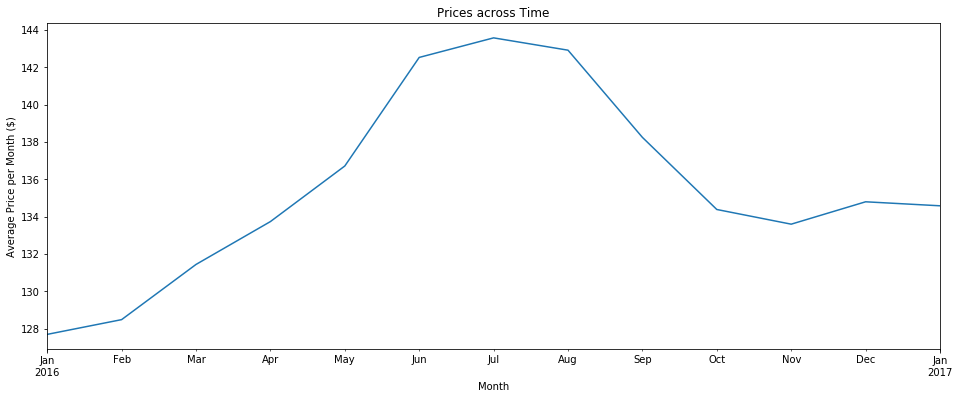

In [129]:
df_calendar.resample(rule = "M").mean()["price_imputed"].plot(figsize = (16,6));
plt.ylabel("Average Price per Month ($)")
plt.xlabel("Month")
plt.title("Prices across Time");

Prices tend to increase disproportionate when approaching summer and start decreasing again after August 
- Hence, monthes as a dummy variable might improve the models predictions

In [130]:
df_calendar.resample(rule = "M").mean()

,listing_id,price_imputed
date,,
2016-01-31,5.548051e+06,127.695273
2016-02-29,5.548051e+06,128.485060
2016-03-31,5.548051e+06,131.441771
2016-04-30,5.548051e+06,133.739221
2016-05-31,5.548051e+06,136.717422
2016-06-30,5.548051e+06,142.534745
2016-07-31,5.548051e+06,143.583151
2016-08-31,5.548051e+06,142.922997
2016-09-30,5.548051e+06,138.251483


In [131]:
df_calendar.reset_index("date",inplace = True)

In [132]:
df_calendar.set_index("listing_id", inplace = True)

In [133]:
df_calendar["month"] = pd.DatetimeIndex(df_calendar["date"]).to_period("M")
df_calendar["month"].value_counts()

2016-12    115413
2016-10    115413
2016-08    115413
2016-07    115413
2016-05    115413
2016-03    115413
2016-11    111690
2016-09    111690
2016-06    111690
2016-04    111690
2016-02    107967
2016-01    104244
2017-01      7446
Freq: M, Name: month, dtype: int64

In [134]:
# check
df_calendar = df_calendar.groupby(["listing_id", "month"]).mean()

In [135]:
df_calendar.head()

price_imputed
listing_id month                 
3335       2016-01          120.0
           2016-02          120.0
           2016-03          120.0
           2016-04          120.0
           2016-05          120.0

In [136]:
df_calendar.reset_index(inplace = True)

In [137]:
df_calendar.head(24)

,listing_id,month,price_imputed
0,3335,2016-01,120.0
1,3335,2016-02,120.0
2,3335,2016-03,120.0
3,3335,2016-04,120.0
4,3335,2016-05,120.0
5,3335,2016-06,120.0
6,3335,2016-07,120.0
7,3335,2016-08,120.0
8,3335,2016-09,120.0
9,3335,2016-10,120.0


In [138]:
month_dummies = ["Jan_16", "Feb_16", "Mar_16", "April_16", "May_16", "June_16", "July_16", "Aug_16", "Sep_16", "Oct_16", "Nov_16", "Dec_16", "Jan_17"]

In [139]:
df_calendar[month_dummies] = pd.get_dummies(df_calendar["month"])

In [140]:
df_calendar.drop(["month"], axis = 1, inplace = True)
# check
df_calendar.head()

,listing_id,price_imputed,Jan_16,Feb_16,Mar_16,April_16,May_16,June_16,July_16,Aug_16,Sep_16,Oct_16,Nov_16,Dec_16,Jan_17
0,3335,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3335,120.0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3335,120.0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3335,120.0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3335,120.0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [141]:
features_reg =  ["house_size", "Apartment", "entire_house", "southeast", "north", "southwest"] + amenities_list + month_dummies[1:]
features_reg

['house_size',
 'Apartment',
 'entire_house',
 'southeast',
 'north',
 'southwest',
 'TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer',
 'Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Pets Allowed',
 'Pets live on this property',
 'Cat(s)',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Dog(s)',
 'Hot Tub',
 'Gym',
 'Elevator in Building',
 'Pool',
 'Other pet(s)',
 'Smoking Allowed',
 'Doorman',
 'Washer ',
 'Feb_16',
 'Mar_16',
 'April_16',
 'May_16',
 'June_16',
 'July_16',
 'Aug_16',
 'Sep_16',
 'Oct_16',
 'Nov_16',
 'Dec_16',
 'Jan_17']

In [142]:
df_prices.set_index("id", inplace = True)

In [143]:
df_calendar.set_index("listing_id", inplace = True)

In [144]:
df_prices.head(3)

,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,...,Wheelchair Accessible,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer
id,,,,,,,,,,,,,,,,,,,,,
241032,NaN,47.636289,-122.371025,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,0,0,0,0,0,0,0,0,0,0
953595,"Queen Anne is a wonderful, truly functional vi...",47.639123,-122.365666,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,0,0,0,0,0,0,0,0,0,0
7421966,NaN,47.638473,-122.369279,Apartment,Entire home/apt,3.0,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",...,0,0,0,0,0,0,0,0,0,0


In [154]:
df_regression = df_calendar.join(df_prices[["house_size", "Apartment", "entire_house", "southeast", "north", "southwest"] + amenities_list], how = "inner")

In [155]:
df_regression.head(14)

,price_imputed,Jan_16,Feb_16,Mar_16,April_16,May_16,June_16,July_16,Aug_16,Sep_16,...,Wheelchair Accessible,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer
4291,82.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4291,82.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df_regression.tail(14)

,price_imputed,Jan_16,Feb_16,Mar_16,April_16,May_16,June_16,July_16,Aug_16,Sep_16,...,Wheelchair Accessible,Dog(s),Hot Tub,Gym,Elevator in Building,Pool,Other pet(s),Smoking Allowed,Doorman,Washer
10339145,219.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10340165,43.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10340165,43.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [157]:
print("df_calendar:", df_calendar.shape)
print("\n")
print("df_prices:", df_prices.shape)
print("\n")
print("df_regression:", df_regression.shape)
print("\n")
df_regression.info()

df_calendar: (48399, 14)


df_prices: (3173, 314)


df_regression: (40170, 61)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40170 entries, 4291 to 10340165
Data columns (total 61 columns):
price_imputed                 40170 non-null float64
Jan_16                        40170 non-null uint8
Feb_16                        40170 non-null uint8
Mar_16                        40170 non-null uint8
April_16                      40170 non-null uint8
May_16                        40170 non-null uint8
June_16                       40170 non-null uint8
July_16                       40170 non-null uint8
Aug_16                        40170 non-null uint8
Sep_16                        40170 non-null uint8
Oct_16                        40170 non-null uint8
Nov_16                        40170 non-null uint8
Dec_16                        40170 non-null uint8
Jan_17                        40170 non-null uint8
house_size                    40170 non-null float64
Apartment                     40170

# Final Lasso Regression


In [158]:
df_regression.columns

Index(['price_imputed', 'Jan_16', 'Feb_16', 'Mar_16', 'April_16', 'May_16',
       'June_16', 'July_16', 'Aug_16', 'Sep_16', 'Oct_16', 'Nov_16', 'Dec_16',
       'Jan_17', 'house_size', 'Apartment', 'entire_house', 'southeast',
       'north', 'southwest', 'TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Kid Friendly', 'Washer',
       'Dryer', 'Free Parking on Premises', 'Buzzer', 'Wireless Intercom',
       'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit',
       'Safety Card', 'Fire Extinguisher', 'Essentials', 'Indoor Fireplace',
       'Shampoo', 'Breakfast', '24-Hour Check-in', 'Hangers', 'Hair Dryer',
       'Iron', 'Laptop Friendly Workspace', 'Suitable for Events',
       'Pets Allowed', 'Pets live on this property', 'Cat(s)',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Dog(s)', 'Hot Tub',
       'Gym', 'Elevator in Building', 'Pool', 'Other pet(s)',
       'Smoking Allowed', 'Doorman', 'Washer '],
      dtype='

In [159]:
features_reg

['house_size',
 'Apartment',
 'entire_house',
 'southeast',
 'north',
 'southwest',
 'TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer',
 'Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Pets Allowed',
 'Pets live on this property',
 'Cat(s)',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Dog(s)',
 'Hot Tub',
 'Gym',
 'Elevator in Building',
 'Pool',
 'Other pet(s)',
 'Smoking Allowed',
 'Doorman',
 'Washer ',
 'Feb_16',
 'Mar_16',
 'April_16',
 'May_16',
 'June_16',
 'July_16',
 'Aug_16',
 'Sep_16',
 'Oct_16',
 'Nov_16',
 'Dec_16',
 'Jan_17']

In [168]:
print(len(features_reg))

59


In [161]:
X = df_regression[features_reg]

y = df_regression["price_imputed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [162]:
lasso = Lasso(normalize = True)
lasso_regressor_4 = GridSearchCV(lasso, parameters, cv = 3)
lasso_regressor_4.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1.0, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
print(lasso_regressor_4.best_params_)
train_score_4 = lasso_regressor_4.score(X_train,y_train)
test_score_4 = lasso_regressor_4.score(X_test,y_test)

print(train_score_4)
print(test_score_4)

{'alpha': 0.01}
0.6184886527558984
0.6288321011961183


In [164]:
test_score_01 - test_score_4
# still just a slight increase, but nearly 1% higher compared to model 02

-0.003661429535128158

In [165]:
lasso_04 = Lasso(alpha = 0.01, normalize = True)
lasso_04.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [166]:
y_train_preds = lasso_04.predict(X_train)

y_test_preds = lasso_04.predict(X_test)

In [167]:
print("The r-squared score of the model for the training-data is {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train)))
r2_04 = r2_score(y_test, y_test_preds)


"The r-squared score of the model for the test-data is {} on {} values.".format(r2_04, len(y_test))

The r-squared score of the model for the training-data is 0.6184886527558984 on 28119 values.


'The r-squared score of the model for the test-data is 0.6288321011961183 on 12051 values.'

# Coefficients - what drives prices the most

In [186]:
coef_dict = dict(zip(features_reg, lasso_04.coef_))

df_coef = pd.DataFrame(data = lasso_04.coef_, index = features_reg, columns = ["Coef"])
print(df_coef.shape)
df_coef = df_coef.query("Coef != 0")

(59, 1)


In [188]:
df_coef["Coef"].sort_values(ascending = False)

entire_house                  33.187715
house_size                    31.594094
southwest                     19.842148
Doorman                       14.392835
Air Conditioning              12.339468
Gym                           10.882045
Elevator in Building          10.582085
Hot Tub                        5.218257
July_16                        4.473543
Pool                           3.285497
Aug_16                         3.077006
June_16                        2.619008
TV                             2.606575
Indoor Fireplace               0.844201
Cat(s)                        -0.169718
Hangers                       -0.223454
Free Parking on Premises      -0.388544
Feb_16                        -1.687955
Pets live on this property    -2.382506
Laptop Friendly Workspace     -3.086699
Pets Allowed                  -5.509651
Name: Coef, dtype: float64

#### EXPLANATION
- SUMMER MONTHES SHOW UP A POSITIVE COEFFICIENT IN THE MODEL!